In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
iris= load_iris()
X = iris.data
y = iris.target


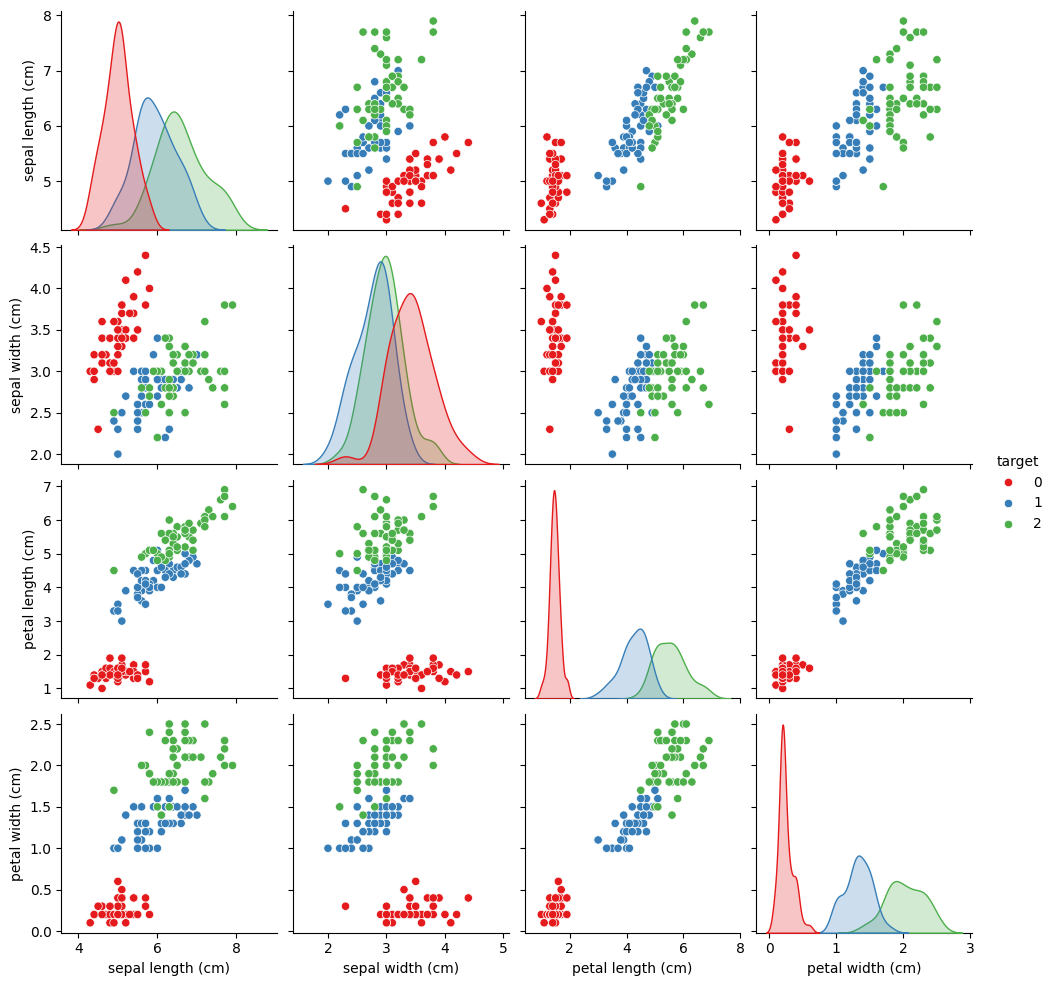

In [8]:
X=pd.DataFrame(X, columns=iris.feature_names)
y=pd.DataFrame(y,columns=['target'])
#print(X.head())
#print(y.head())
sns.pairplot(pd.concat([X, y], axis=1), hue='target', palette='Set1')
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\iris_supervised\Features.png")

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train) 
X_test_scaled= scaler.transform(X_test)

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy={}
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n {name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    accuracy[name] = accuracy_score(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D using PCA (for plotting only) as original data is 4D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to plot decision boundaries 
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    y = np.array(y)  # Ensures it's a NumPy array as required by contourf
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis', s=40)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\iris_supervised\{title}.png")
    plt.ylabel('PCA Component 2')
    plt.show()


LOGISTIC REGRESSION


In [9]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
print(log_reg.score(X_train_scaled,y_train))
evaluate_model("Logistic Regression", log_reg, X_test_scaled, y_test)

0.9666666666666667

 Logistic Regression Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


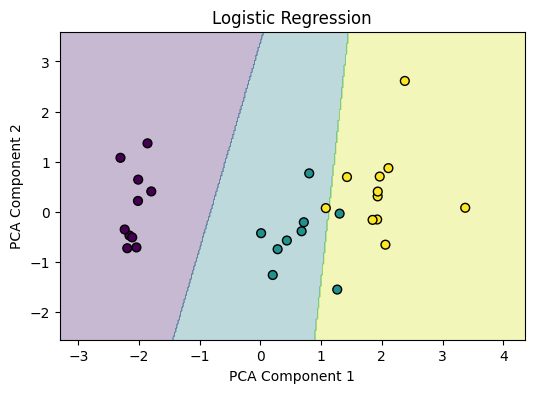

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
plot_decision_boundary(log_reg, X_test_pca, y_test, "Logistic Regression")


K-Nearest Neighbours 


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
evaluate_model("K-Nearest Neighbors", knn, X_test_scaled, y_test)



 K-Nearest Neighbors Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
accuracy

{'Logistic Regression': 1.0, 'K-Nearest Neighbors': 1.0}

c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


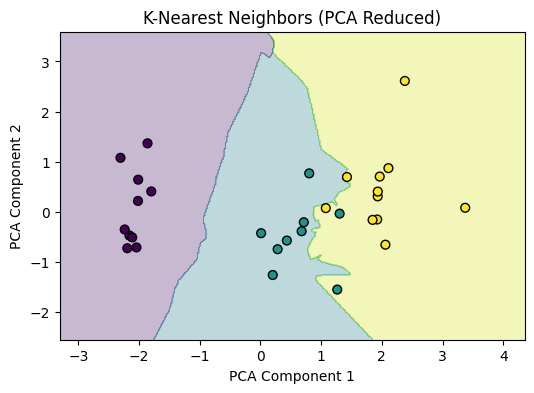

In [23]:
reduced_knn=KNeighborsClassifier(n_neighbors=3) 
reduced_knn.fit(X_train_pca, y_train)
plot_decision_boundary(reduced_knn, X_test_pca, y_test, "K-Nearest Neighbors (PCA Reduced)")

Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier     
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
evaluate_model("Decision Tree", dt, X_test_scaled, y_test)


 Decision Tree Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



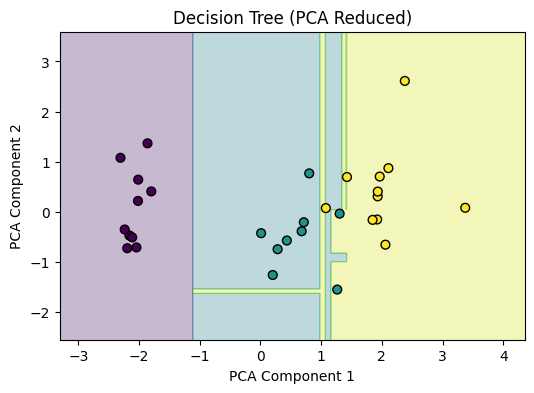

In [24]:
reduced_dt = DecisionTreeClassifier(random_state=42)
reduced_dt.fit(X_train_pca, y_train)
plot_decision_boundary(reduced_dt, X_test_pca, y_test, "Decision Tree (PCA Reduced)")

Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
evaluate_model("Random Forest", rf, X_test_scaled, y_test)

c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



 Random Forest Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


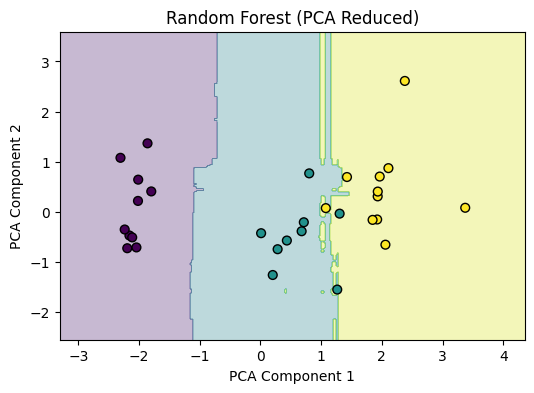

In [25]:
reduced_rf = RandomForestClassifier(random_state=42)
reduced_rf.fit(X_train_pca, y_train)
plot_decision_boundary(reduced_rf, X_test_pca, y_test, "Random Forest (PCA Reduced)")

Support Vector Machine

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_model("Support Vector Machine", svm, X_test_scaled, y_test)

c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Support Vector Machine Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\DELL PC\Desktop\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


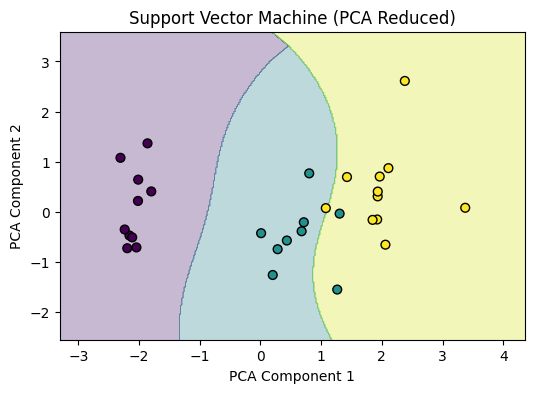

In [26]:
reduced_svm= SVC(kernel='rbf', random_state=42)
reduced_svm.fit(X_train_pca, y_train)
plot_decision_boundary(reduced_svm, X_test_pca, y_test, "Support Vector Machine (PCA Reduced)")

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_20152\2189504741.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_scores, palette="viridis")


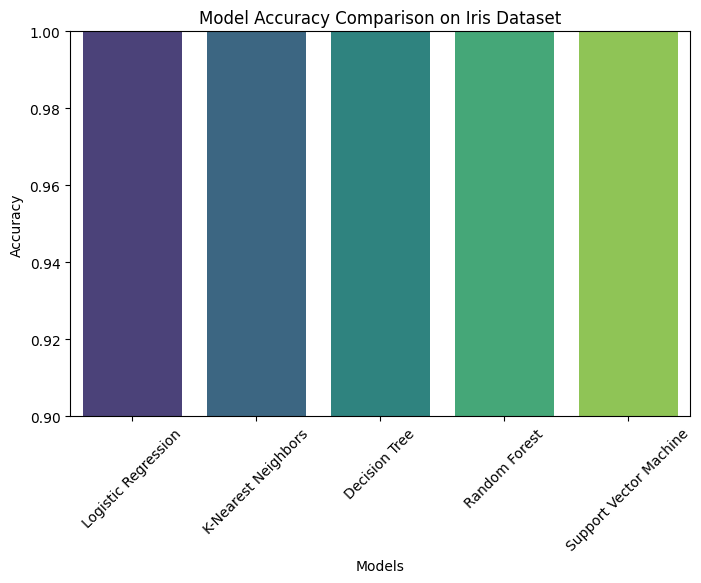

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


model_names = list(accuracy.keys())
model_scores = list(accuracy.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_scores, palette="viridis")
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.xticks(rotation=45)
plt.show()
